In [2]:
import expectexception
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import warnings; warnings.filterwarnings(action='ignore')
%matplotlib inline
#for Netcdf manipulation
import xarray as xr  
from netCDF4 import Dataset
import netCDF4 as nc

#for array manipulation
import numpy as np
import pandas as pd

#for plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt

#for interpolation
from scipy.spatial import cKDTree

import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea


import netCDF4
import numpy
import xarray
from netCDF4 import Dataset
import datetime
import csv
from scipy import signal

from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from matplotlib import rcParams 
import seaborn as sns

import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
import pandas as pd
import datetime
import os
from datetime import datetime
import matplotlib.patheffects as PathEffects
import geocat.viz as gv
#from geocat.viz import cmaps as gvcmaps
import cmaps
import geocat.datafiles as gdf
import geocat.viz as gv
import geocat.viz.util as gvutil
from scipy import stats
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import math

from statistics import mean
from itertools import chain

import numpy as np 
from scipy.stats import t
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

from statistics import mean
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

In [3]:
##Set up all functions
#  regional average
def wgt_areaave(indat, latS, latN, lonW, lonE):
  lat=indat.lat
  lon=indat.lon

  if ( ((lonW < 0) or (lonE < 0 )) and (lon.values.min() > -1) ):
     anm=indat.assign_coords(lon=( (lon + 180) % 360 - 180) )
     lon=( (lon + 180) % 360 - 180) 
  else:
     anm=indat

  iplat = lat.where( (lat >= latS ) & (lat <= latN), drop=True)
  iplon = lon.where( (lon >= lonW ) & (lon <= lonE), drop=True)
  
#  print(iplat)
#  print(iplon)
  wgt = np.cos(np.deg2rad(lat))
  odat=anm.sel(lat=iplat,lon=iplon).weighted(wgt).mean(("lon", "lat"), skipna=True)
  return(odat)

def detrend_dim(da,trend, dim, deg=1):
    '''detrend along a single dimension'''
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(trend[dim], p.polyfit_coefficients)
    return da - fit

def mean(x):
    avg = sum(x)/len(x)
    return round(avg,2)

def adjust(ds):
    '''transform the data'''
    z1 = np.array(ds)
    df = pd.DataFrame (z1)
    pred = df.iloc[:,0]
    return pred 

def correlation(x,y,z):
    corr_test = np.corrcoef(x [0:i],y [0:i])[0,1]
    z.append(corr_test)
    
def lowpass_filter (x,y):
    '''fraction of nyquist frequency, here  it is 10 years'''
    fs=1/12/30/24/3600 

    nyquist = fs / 2 # 0.5 times the sampling frequency
    cutoff=x # fraction of nyquist frequency, here  it is 10 years
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter


    dUfilt = signal.filtfilt(b, a, y)
    dUfilt=np.array(dUfilt)
    dUfilt=dUfilt.transpose()
    return dUfilt

def average_every_n_elements(lst, n=12):
    return [sum(lst[i:i+n]) / n for i in range(0, len(lst), n) if len(lst[i:i+n]) == n]

In [4]:
##saved path of Channel-wise-based CNN prediction
outdir =  'C:/Users/user/Research/Research Code/CNN/PDO/'
outdir_smooth_pred_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred/'
outdir_smooth_test_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/test/'
outdir_smooth_valid_CWCNN_PDO= 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/validation/'
outdir_correlation_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/correlation/'

In [5]:
ifile ='C:/Users/user/Research/Research Code/CNN/PDO/'
ifile_data = 'C:/Users/user/Research/Research Code/CNN/Data/'

In [6]:
##saved path of CNN
outdir_smooth_pred_CNN_PDO = 'C:/Users/user/Research/Research Code/CNN/PDO/smoothed/pred/'
outdir_smooth_test_CNN_PDO = 'C:/Users/user/Research/Research Code/CNN/PDO/smoothed/test/'
outdir_correlation_CNN_PDO = 'C:/Users/user/Research/Research Code/CNN/PDO/Correlation/'

In [7]:
##saved path of CMIP6 simulations
outdir_smooth_pred_MME_PDO =  'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/pred/'
outdir_smooth_test_MME_PDO =  'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/test/'
outdir_correlation_MME_PDO = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/correlation/'

In [8]:
#Import validation
outdir_smooth_valid= 'C:/Users/user/Research/Research Code/CNN/PDO/smoothed/validation/'
PDO_ncei = np.loadtxt(outdir_smooth_valid+'Result_PDO index_ncei_smoothed'+'.csv', dtype=float)

In [9]:
##Import correlation of Channel-wise-based CNN prediction and CMIP6 simulations
cor_cnn = np.loadtxt(outdir_correlation_CNN_PDO+'mean_Correlation_cnn_ncei_smoothed'+'.csv', dtype=float)
cor_cwcnn = np.loadtxt(outdir_correlation_CWCNN_PDO+'mean_Correlation_cw-cnn_ncei_smoothed'+'.csv', dtype=float)
cor_mme = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MME.csv')
cor_ACCESS_CM2 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_ACCESS-CM2.csv')
cor_CAMS_CSM1_0 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CAMS-CSM1-0.csv')
cor_CanESM5 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CanESM5.csv')
cor_CMCC_CM2_SR5 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CMCC-CM2-SR5.csv')
cor_INM_CM4_8 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_INM-CM4-8.csv')
cor_MIROC6 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MIROC6.csv')
cor_MPI_ESM1_2 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MPI-ESM1-2.csv')

In [10]:
print('Mean Correlation cnn: ',mean(cor_cnn[0:]))
print('Mean Correlation cw-cnn: ',mean(cor_cwcnn[0:]))
print('Mean Correlation mee: ',mean(cor_mme[:]))
print('Mean Correlation ACCESS_CM2: ',mean(cor_ACCESS_CM2[:]))
print('Mean Correlation CAMS_CSM1_0: ',mean(cor_CAMS_CSM1_0[:]))
print('Mean Correlation CanESM5: ',mean(cor_CanESM5[:]))
print('Mean Correlation CMCC_CM2_SR5: ',mean(cor_CMCC_CM2_SR5[:]))
print('Mean Correlation INM_CM4_8: ',mean(cor_INM_CM4_8[:]))
print('Mean Correlation MIROC6: ',mean(cor_MIROC6[:]))
print('Mean Correlation MPI_ESM1_2: ',mean(cor_MPI_ESM1_2[:]))

Mean Correlation cnn:  0.68
Mean Correlation cw-cnn:  0.82
Mean Correlation mee:  0.64
Mean Correlation ACCESS_CM2:  0.25
Mean Correlation CAMS_CSM1_0:  0.65
Mean Correlation CanESM5:  -0.08
Mean Correlation CMCC_CM2_SR5:  0.03
Mean Correlation INM_CM4_8:  0.34
Mean Correlation MIROC6:  0.34
Mean Correlation MPI_ESM1_2:  -0.17


In [11]:
## Set up time
a = pd.date_range('1983-01', '2023-01', freq="M",name='dates')
time = np.arange(1, 31)

# Multi-model comparision

In [12]:
##Imported correlation of State of art methods
corr_summay = pd.read_excel(ifile+'PDO method comparison.xlsx',sheet_name= 'Summary',
                         header=0,
                         index_col=None,
                         skiprows=0, 
                         usecols=[0,1,2,3,4,5,7]
                       )

print(corr_summay)

    Time   MME   EOF   APT  CGCM   LIM   SGRU
0      0  0.00  0.00  0.00  0.00  0.00  0.000
1      1  0.57  0.59  0.40  0.45  0.50  0.785
2      2  0.55  0.33  0.38  0.28  0.20  0.872
3      3  0.51  0.17  0.25  0.39  0.10  0.672
4      4  0.49  0.15  0.21  0.60  0.20    NaN
5      5  0.42  0.10  0.20   NaN  0.27    NaN
6      6  0.37  0.14  0.19   NaN  0.24    NaN
7      7  0.28  0.14  0.19   NaN  0.23    NaN
8      8  0.25  0.15  0.17   NaN  0.25    NaN
9      9  0.35  0.07  0.16   NaN  0.48    NaN
10    10   NaN  0.12  0.15   NaN   NaN    NaN


In [13]:
z1 = np.array(corr_summay)
df_corr_summary = pd.DataFrame (z1)

cor_EOF = df_corr_summary[2]
cor_APT = df_corr_summary[3]
cor_CGCM = df_corr_summary[4]
cor_LIM = df_corr_summary[5]
cor_SGRU = df_corr_summary[6]

In [14]:
##Correlation of channel-wise-based CNN
print('Mean Correlation cw-cnn: ',mean(cor_cwcnn))

##Correlation of CMIP6 simulations
print('Mean Correlation mee: ',mean(cor_mme))
print('Mean Correlation ACCESS_CM2: ',mean(cor_ACCESS_CM2))
print('Mean Correlation CAMS_CSM1_0: ',mean(cor_CAMS_CSM1_0))
print('Mean Correlation CanESM5: ',mean(cor_CanESM5))
print('Mean Correlation CMCC_CM2_SR5: ',mean(cor_CMCC_CM2_SR5))
print('Mean Correlation INM_CM4_8: ',mean(cor_INM_CM4_8))
print('Mean Correlation MIROC6: ',mean(cor_MIROC6))
print('Mean Correlation MPI_ESM1_2: ',mean(cor_MPI_ESM1_2))

##Correlation of State of art methods
print('Mean Correlation EOF: ',mean(cor_EOF[1:]))
print('Mean Correlation APT: ',mean(cor_APT[1:]))
print('Mean Correlation CGCM: ',mean(cor_CGCM[1:4]))
print('Mean Correlation LIM: ',mean(cor_LIM[1:9]))
print('Mean Correlation SGRU: ',mean(cor_SGRU[1:4]))

Mean Correlation cw-cnn:  0.82
Mean Correlation mee:  0.64
Mean Correlation ACCESS_CM2:  0.25
Mean Correlation CAMS_CSM1_0:  0.65
Mean Correlation CanESM5:  -0.08
Mean Correlation CMCC_CM2_SR5:  0.03
Mean Correlation INM_CM4_8:  0.34
Mean Correlation MIROC6:  0.34
Mean Correlation MPI_ESM1_2:  -0.17
Mean Correlation EOF:  0.2
Mean Correlation APT:  0.23
Mean Correlation CGCM:  0.37
Mean Correlation LIM:  0.25
Mean Correlation SGRU:  0.78


In [15]:
## Combine all correlations to compute the 95% confidence level of the all-model based on the bootstrap approach.
x = []

x.extend(adjust(cor_cwcnn[1:]))
x.extend(adjust(cor_mme[1:]))
x.extend(adjust(cor_ACCESS_CM2[1:]))
x.extend(adjust(cor_CAMS_CSM1_0[1:]))
x.extend(adjust(cor_CanESM5[1:]))
x.extend(adjust(cor_CMCC_CM2_SR5[1:]))
x.extend(adjust(cor_INM_CM4_8 [1:]))
x.extend(adjust(cor_MIROC6[1:]))
x.extend(adjust(cor_MPI_ESM1_2[1:]))
x.extend(adjust(cor_EOF[1:]))
x.extend(adjust(cor_APT[1:]))
x.extend(adjust(cor_CGCM[1:4]))
x.extend(adjust(cor_LIM[1:9]))
x.extend(adjust(cor_SGRU[1:4]))

print(x)

[0.84167, 0.83083, 0.845, 0.835, 0.83083, 0.82583, 0.83167, 0.82333, 0.8275, 0.82083, 0.825, 0.82667, 0.8225, 0.8175, 0.8175, 0.8325, 0.8225, 0.82667, 0.83583, 0.8175, 0.80833, 0.81583, 0.8225, 0.81167, 0.815, 0.82167, 0.80333, 0.81, 0.8225, 0.9688538383160686, 0.8755962606130647, 0.7814807477141796, 0.7428424366986097, 0.7376275279705065, 0.738281511514365, 0.7387225054376019, 0.7401657343170829, 0.7415550739464001, 0.7402181953802633, 0.7342603387340793, 0.714641419637774, 0.6905804597940667, 0.6645543127017132, 0.6332614076030905, 0.6021325565498163, 0.5762694130075854, 0.5563180691163384, 0.5357185951980162, 0.5171253264404894, 0.5015834006447019, 0.4879082303495472, 0.4774620690333822, 0.46782427193734893, 0.45570000075631345, 0.4430832168203964, 0.42903869005856865, 0.41374566258920126, 0.3977960392604656, 0.3105513695999861, 0.2193228606027966, 0.22910762416604796, 0.23433986229271586, 0.25255158167332964, 0.27112851886910927, 0.27678913458779497, 0.28049897273173807, 0.28228776

In [16]:
#calculate 95% confident Level of all methods based on bootstrap method 
confidence = 0.95
values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(1000)] 
cf = np.percentile(values,[100*(1-(1-confidence))]) 
cf

array([0.32989541])

In [17]:
#calculate 95% confident Level of MME based on bootstrap method 
def bootstrap_sample(data, num_samples):
    return np.random.choice(data, size=num_samples, replace=True)

cor_mme = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_MME.csv', dtype=float)
lower_mme = []
upper_mme=[]

for i in range (0,360):
    
    data = adjust(cor_mme[:i])
    bootstrap_means = []

    for _ in range(1000):  # doing 1000 bootstrap samples
        sample = bootstrap_sample(data, len(data))
        bootstrap_means.append(np.mean(sample))

    confidence_level = 0.95
    lower_percentile = (1-confidence_level)/2 * 100
    upper_percentile = (1+confidence_level)/2 * 100

    confidence_interval = (np.percentile(bootstrap_means, lower_percentile),
                           np.percentile(bootstrap_means, upper_percentile))
    
    
    lower_mme.append(confidence_interval[0])
    upper_mme.append(confidence_interval[1])

    
rescale_lower_mme = average_every_n_elements(lower_mme)
rescale_upper_mme = average_every_n_elements(upper_mme)


In [18]:
#calculate 95% confident Level of CAMS-CSM1-0 based on bootstrap method 
def bootstrap_sample(data, num_samples):
    return np.random.choice(data, size=num_samples, replace=True)

cor_CAMS_CSM1_0 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_CAMS-CSM1-0.csv', dtype=float)
lower_CAMS_CSM1_0 = []
upper_CAMS_CSM1_0=[]

for i in range (0,360):
    
    data = adjust(cor_CAMS_CSM1_0[:i])
    bootstrap_means = []

    for _ in range(1000):  # doing 1000 bootstrap samples
        sample = bootstrap_sample(data, len(data))
        bootstrap_means.append(np.mean(sample))

    confidence_level = 0.95
    lower_percentile = (1-confidence_level)/2 * 100
    upper_percentile = (1+confidence_level)/2 * 100

    confidence_interval = (np.percentile(bootstrap_means, lower_percentile),
                           np.percentile(bootstrap_means, upper_percentile))
    
    
    lower_CAMS_CSM1_0.append(confidence_interval[0])
    upper_CAMS_CSM1_0.append(confidence_interval[1])

    
rescale_lower_CAMS_CSM1_0 = average_every_n_elements(lower_CAMS_CSM1_0)
rescale_upper_CAMS_CSM1_0 = average_every_n_elements(upper_CAMS_CSM1_0)


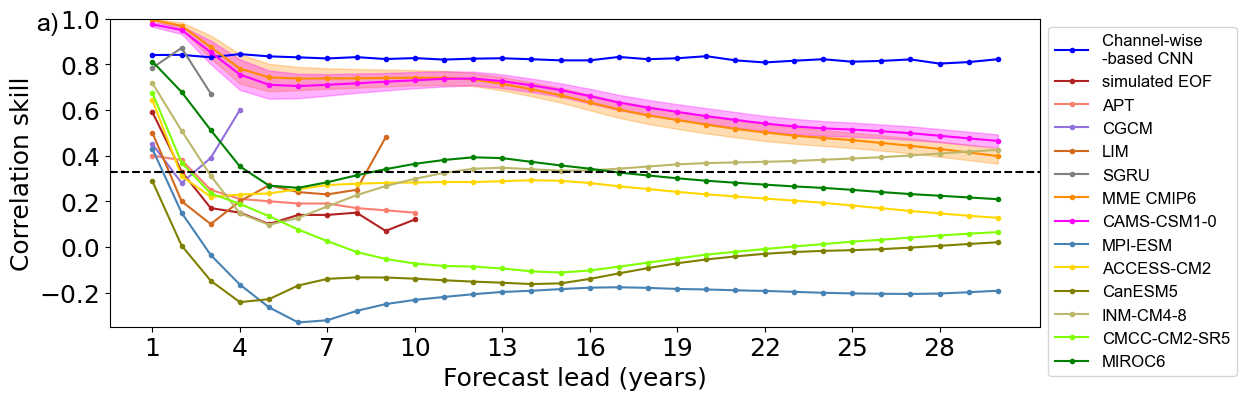

In [19]:
##Import correlation

cor_cwcnn = np.loadtxt(outdir_correlation_CWCNN_PDO+'mean_Correlation_cw-cnn_ncei_smoothed'+'.csv', dtype=float)
cor_mme = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MME.csv')
cor_ACCESS_CM2 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_ACCESS-CM2.csv')
cor_CAMS_CSM1_0 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CAMS-CSM1-0.csv')
cor_CanESM5 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CanESM5.csv')
cor_CMCC_CM2_SR5 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_CMCC-CM2-SR5.csv')
cor_INM_CM4_8 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_INM-CM4-8.csv')
cor_MIROC6 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MIROC6.csv')
cor_MPI_ESM1_2 = np.loadtxt(outdir_correlation_MME_PDO+'Smoothed_Correlation_mean_MPI-ESM1-2.csv')

##Convert data
cor_cwcnn=adjust(cor_cwcnn[:])
cor_MIROC6=adjust(cor_MIROC6[:])
cor_ACCESS_CM2=adjust(cor_ACCESS_CM2[:])
cor_mme=adjust(cor_mme[:])
cor_MPI_ESM1_2=adjust(cor_MPI_ESM1_2[:])
cor_CAMS_CSM1_0=adjust(cor_CAMS_CSM1_0[:])
cor_CanESM5=adjust(cor_CanESM5[:])
cor_INM_CM4_8=adjust(cor_INM_CM4_8[:])
cor_CMCC_CM2_SR5=adjust(cor_CMCC_CM2_SR5[:])


# plotted correlation graph (Figure 2a))
plt.figure(figsize=(12,4))

plt.plot(time,cor_cwcnn, label='Channel-wise \n-based CNN', color = 'blue',marker='.')
plt.plot(cor_EOF[1:], label='simulated EOF', color='firebrick',marker='.')
plt.plot(cor_APT[1:], label='APT', color='salmon',marker='.')
plt.plot(cor_CGCM[1:], label='CGCM', color='mediumpurple',marker='.')
plt.plot(cor_LIM[1:], label='LIM', color='chocolate',marker='.')
plt.plot(cor_SGRU[1:], label='SGRU', color='grey',marker='.')


plt.plot(time,cor_mme, label='MME CMIP6', color = 'darkorange',marker='.')
plt.fill_between(time, rescale_lower_mme[2:32],rescale_upper_mme[2:32], color='darkorange', alpha=0.3)

plt.plot(time,cor_CAMS_CSM1_0, label='CAMS-CSM1-0', color = 'magenta',marker='.')
plt.fill_between(time, rescale_lower_CAMS_CSM1_0[2:32],rescale_upper_CAMS_CSM1_0[2:32], color='magenta', alpha=0.3)

plt.plot(time[:],cor_MPI_ESM1_2[:], label='MPI-ESM', color='steelblue',marker='.')
plt.plot(time[:],cor_ACCESS_CM2[:], label='ACCESS-CM2', color='gold',marker='.')
plt.plot(time[:],cor_CanESM5[:], label='CanESM5', color='olive',marker='.')
plt.plot(time[:],cor_INM_CM4_8[:], label='INM-CM4-8', color='darkkhaki',marker='.')
plt.plot(time[:],cor_CMCC_CM2_SR5[:], label='CMCC-CM2-SR5', color='chartreuse',marker='.')
plt.plot(time[:],cor_MIROC6[:], label='MIROC6', color='green',marker='.')


plt.axhline(y=cf, c="black", linestyle = 'dashed' )


plt.rcParams["font.family"] = "Arial"

plt.text(-3,0.95 , "a)",fontsize=18)
plt.xlabel('Forecast lead (years)',fontsize=18)
plt.ylabel('Correlation skill',fontsize=18)  
labels = np.arange(1, 31,3)
plt.xticks(labels,fontsize=18)
plt.ylim(-0.35, 1)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=12,bbox_to_anchor=(1, 1))
plt.savefig(outdir+'Smooth correlation of prediction_all_methods.png', bbox_inches='tight')

# END